\newpage

## Question 1


In [517]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
from patsy import dmatrices, dmatrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import matplotlib.cm as cm
from sklearn import neighbors

In [255]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

（1）

Based on the dataset, our classification problem is to distinguish between people with or without chronic kidney disease by classifying the target variable into two possible classes (‘ckd’ and ‘not ckd’). Building a classification model can help us detect early and prevent this disease.

(2)

By the information of the dataset, we observe that some variables’ types are misclassified. For example, some variables only contain limited levels (e.g. Binary) but have float type. Thus, we fix all the categorical and continuous data types. Then we combine the data frame X and y in one data frame for further data preprocessing because we want both data frames to contain the same rows after cleaning. When we look at the levels in Binary (Categorical) variables, we observe that some of them contain the third category with an additional `\t`. It is because there is an additional tab stop when naming the category, so we remove this tab stop for the category and there will be only two categories for those variables. For example, the category 'ckd\t' in the variable `class` becomes 'ckd' (with chronic kidney disease).

In [256]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,14.2,51.0,7200.0,5.9,no,no,no,good,no,no


In [257]:
y

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [258]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [259]:
y.dtypes

class    object
dtype: object

In [ ]:
convert_to_cate = ['sg', 'al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
for col in convert_to_cate:
    X[col] = pd.Categorical(X[col])

In [261]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     391 non-null    float64 
 1   bp      388 non-null    float64 
 2   sg      353 non-null    category
 3   al      354 non-null    category
 4   su      351 non-null    category
 5   rbc     248 non-null    category
 6   pc      335 non-null    category
 7   pcc     396 non-null    category
 8   ba      396 non-null    category
 9   bgr     356 non-null    float64 
 10  bu      381 non-null    float64 
 11  sc      383 non-null    float64 
 12  sod     313 non-null    float64 
 13  pot     312 non-null    float64 
 14  hemo    348 non-null    float64 
 15  pcv     329 non-null    float64 
 16  wbcc    294 non-null    float64 
 17  rbcc    269 non-null    float64 
 18  htn     398 non-null    category
 19  dm      398 non-null    category
 20  cad     398 non-null    category
 21  appet   399 non-

In [262]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   400 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB


In [ ]:
y['class'] = pd.Categorical(y['class'])

In [281]:
df = pd.concat([X, y], axis=1)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [282]:
cate_col = df.select_dtypes(include=['category']).columns
for col in cate_col:
    print(f"{col}: {df[col].unique()}")

sg: [1.020, 1.010, 1.005, 1.015, NaN, 1.025]
Categories (5, float64): [1.005, 1.010, 1.015, 1.020, 1.025]
al: [1.0, 4.0, 2.0, 3.0, 0.0, NaN, 5.0]
Categories (6, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
su: [0.0, 3.0, 4.0, 1.0, NaN, 2.0, 5.0]
Categories (6, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
rbc: [NaN, 'normal', 'abnormal']
Categories (2, object): ['abnormal', 'normal']
pc: ['normal', 'abnormal', NaN]
Categories (2, object): ['abnormal', 'normal']
pcc: ['notpresent', 'present', NaN]
Categories (2, object): ['notpresent', 'present']
ba: ['notpresent', 'present', NaN]
Categories (2, object): ['notpresent', 'present']
htn: ['yes', 'no', NaN]
Categories (2, object): ['no', 'yes']
dm: ['yes', 'no', '\tno', NaN]
Categories (3, object): ['\tno', 'no', 'yes']
cad: ['no', 'yes', NaN]
Categories (2, object): ['no', 'yes']
appet: ['good', 'poor', NaN]
Categories (2, object): ['good', 'poor']
pe: ['no', 'yes', NaN]
Categories (2, object): ['no', 'yes']
ane: ['no', 'yes', NaN]
Categories (2, o

In [ ]:
df['class'] = df['class'].replace('ckd\t', 'ckd')
df['dm'] = df['dm'].replace('\tno', 'no')

In [287]:
df['class'].unique()

['ckd', 'notckd']
Categories (2, object): ['ckd', 'notckd']

In [285]:
df['dm'].unique()

['yes', 'no', NaN]
Categories (2, object): ['no', 'yes']

（3）

age：age

bp：blood pressure

sg：specific gravity

al：albumin

su：sugar

rbc：red blood cells

pc：pus cell

pcc：pus cell clumps

ba：bacteria

bgr：blood glucose random

bu：blood urea

sc：serum creatinine

sod：sodium

pot：potassium

hemo：hemoglobin

pcv：packed cell volume

wc：white blood cell count

rc：red blood cell count

htn：hypertension

dm：diabetes mellitus

cad：coronary artery disease

appet：appetite

pe：pedal edema

ane：anemia

class：class

We can see the entire dataset includes 400 observations and 25 columns. There are 24 predictor variables and 1 target variable (`class`) in the dataset. After Variable Transformation, there are 14 category type (categorical variable) and 11 float type variables (numerical variable). Except for the target variable `class`, all the predictor variables contain missing values. The variable `white blood cell count` has a higher standard deviation (2944.474190) which indicates greater variability in white blood cell count among patients in the dataset (min is 2200 and max is 26400). Moreover, looking at the distribution of the target variable `class`, we can see that people with chronic kidney disease (around 250 people) are more than people without chronic kidney disease (around 150 people) in this dataset.

In [288]:
df.dtypes

age       float64
bp        float64
sg       category
al       category
su       category
rbc      category
pc       category
pcc      category
ba       category
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn      category
dm       category
cad      category
appet    category
pe       category
ane      category
class    category
dtype: object

In [289]:
df.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     391 non-null    float64 
 1   bp      388 non-null    float64 
 2   sg      353 non-null    category
 3   al      354 non-null    category
 4   su      351 non-null    category
 5   rbc     248 non-null    category
 6   pc      335 non-null    category
 7   pcc     396 non-null    category
 8   ba      396 non-null    category
 9   bgr     356 non-null    float64 
 10  bu      381 non-null    float64 
 11  sc      383 non-null    float64 
 12  sod     313 non-null    float64 
 13  pot     312 non-null    float64 
 14  hemo    348 non-null    float64 
 15  pcv     329 non-null    float64 
 16  wbcc    294 non-null    float64 
 17  rbcc    269 non-null    float64 
 18  htn     398 non-null    category
 19  dm      398 non-null    category
 20  cad     398 non-null    category
 21  appet   399 non-

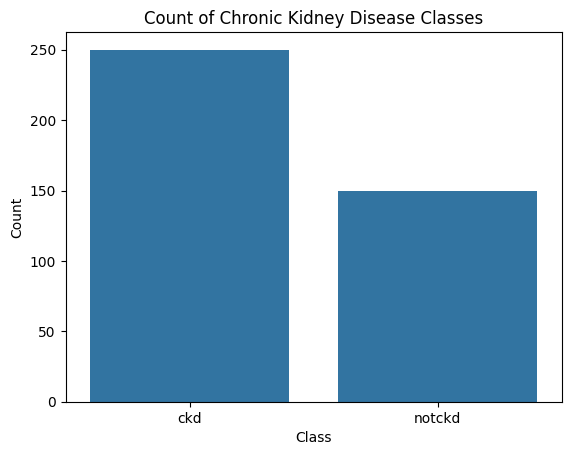

In [292]:
sns.countplot(
    data=df,
    x = 'class'
)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Count of Chronic Kidney Disease Classes")
plt.show()

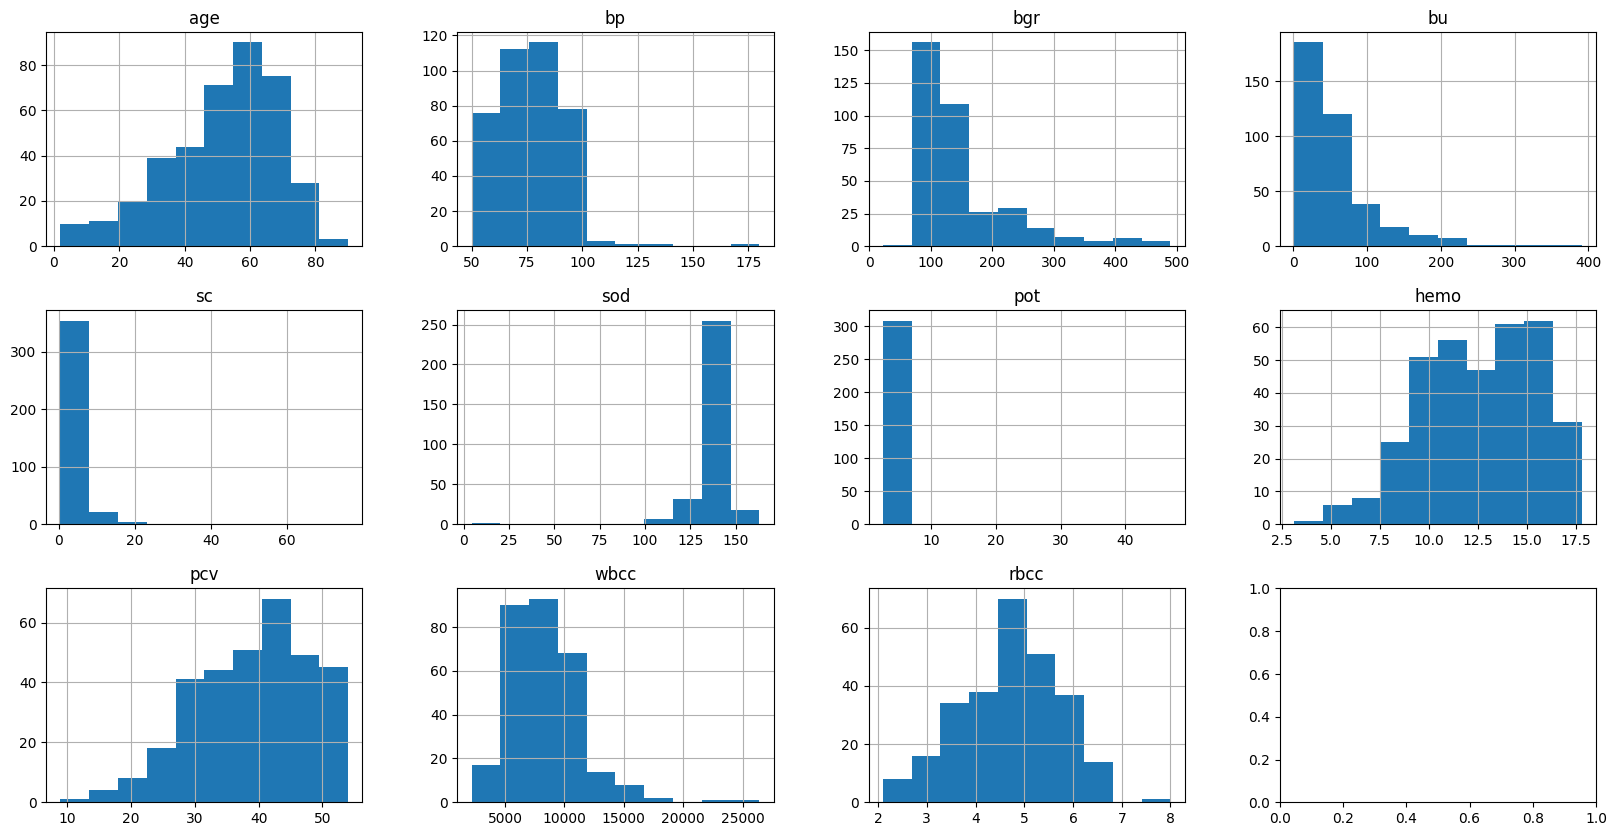

In [301]:
data1 = df.select_dtypes(include=['float64'])
columns = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc' ]
fig, axs = plt.subplots(3, 4, figsize=(20, 10))
for ax, col in zip(axs.flatten(), columns):
    data1.hist(column=col, ax=ax)

(4)

 This is a correlation heat map among all the numerical variables, which are `age`, blood pressure (`bp`), blood glucose random (`bgr`), blood urea (`bu`), serum creatinine (`sc`), sodium (`sod`), potassium (`pot`), hemoglobin (`hemo`), packed cell volume (`pcv`), white blood cell count (`wbcc`) and red blood cell count (`rbcc`). The lighter the colour, the higher the positive correlation between the two variables. As we could observe, hemoglobin (`hemo`) and packed cell volume (`pcv`) have a correlation value of 0.9. Moreover, the correlation of red blood cell count (`rbcc`) and hemoglobin (`hemo`) is 0.8; the correlation of red blood cell count (`rbcc`) and packed cell volume (`pcv`) is 0.79. Nevertheless, this result also implies that these three pairs of variables could be combined into one new variable. However, this idea will be discussed more if a dimensional deduction analysis, such as the principal component analysis, is needed.


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     391 non-null    float64 
 1   bp      388 non-null    float64 
 2   sg      353 non-null    category
 3   al      354 non-null    category
 4   su      351 non-null    category
 5   rbc     248 non-null    category
 6   pc      335 non-null    category
 7   pcc     396 non-null    category
 8   ba      396 non-null    category
 9   bgr     356 non-null    float64 
 10  bu      381 non-null    float64 
 11  sc      383 non-null    float64 
 12  sod     313 non-null    float64 
 13  pot     312 non-null    float64 
 14  hemo    348 non-null    float64 
 15  pcv     329 non-null    float64 
 16  wbcc    294 non-null    float64 
 17  rbcc    269 non-null    float64 
 18  htn     398 non-null    category
 19  dm      398 non-null    category
 20  cad     398 non-null    category
 21  appet   399 non-

In [296]:
df_drop_cate = df.drop(columns = df.select_dtypes(include=['category']).columns)
df_drop_cate

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
0,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


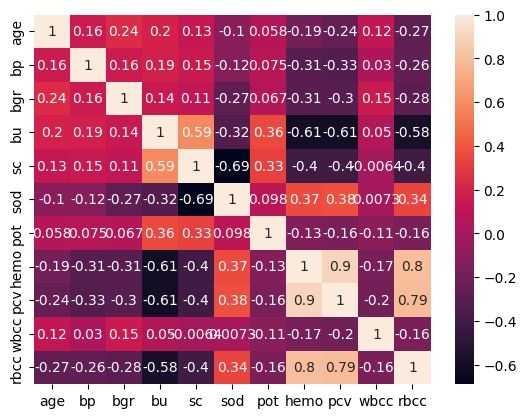

In [297]:
sns.heatmap(df_drop_cate.corr(),annot=True)
plt.show()

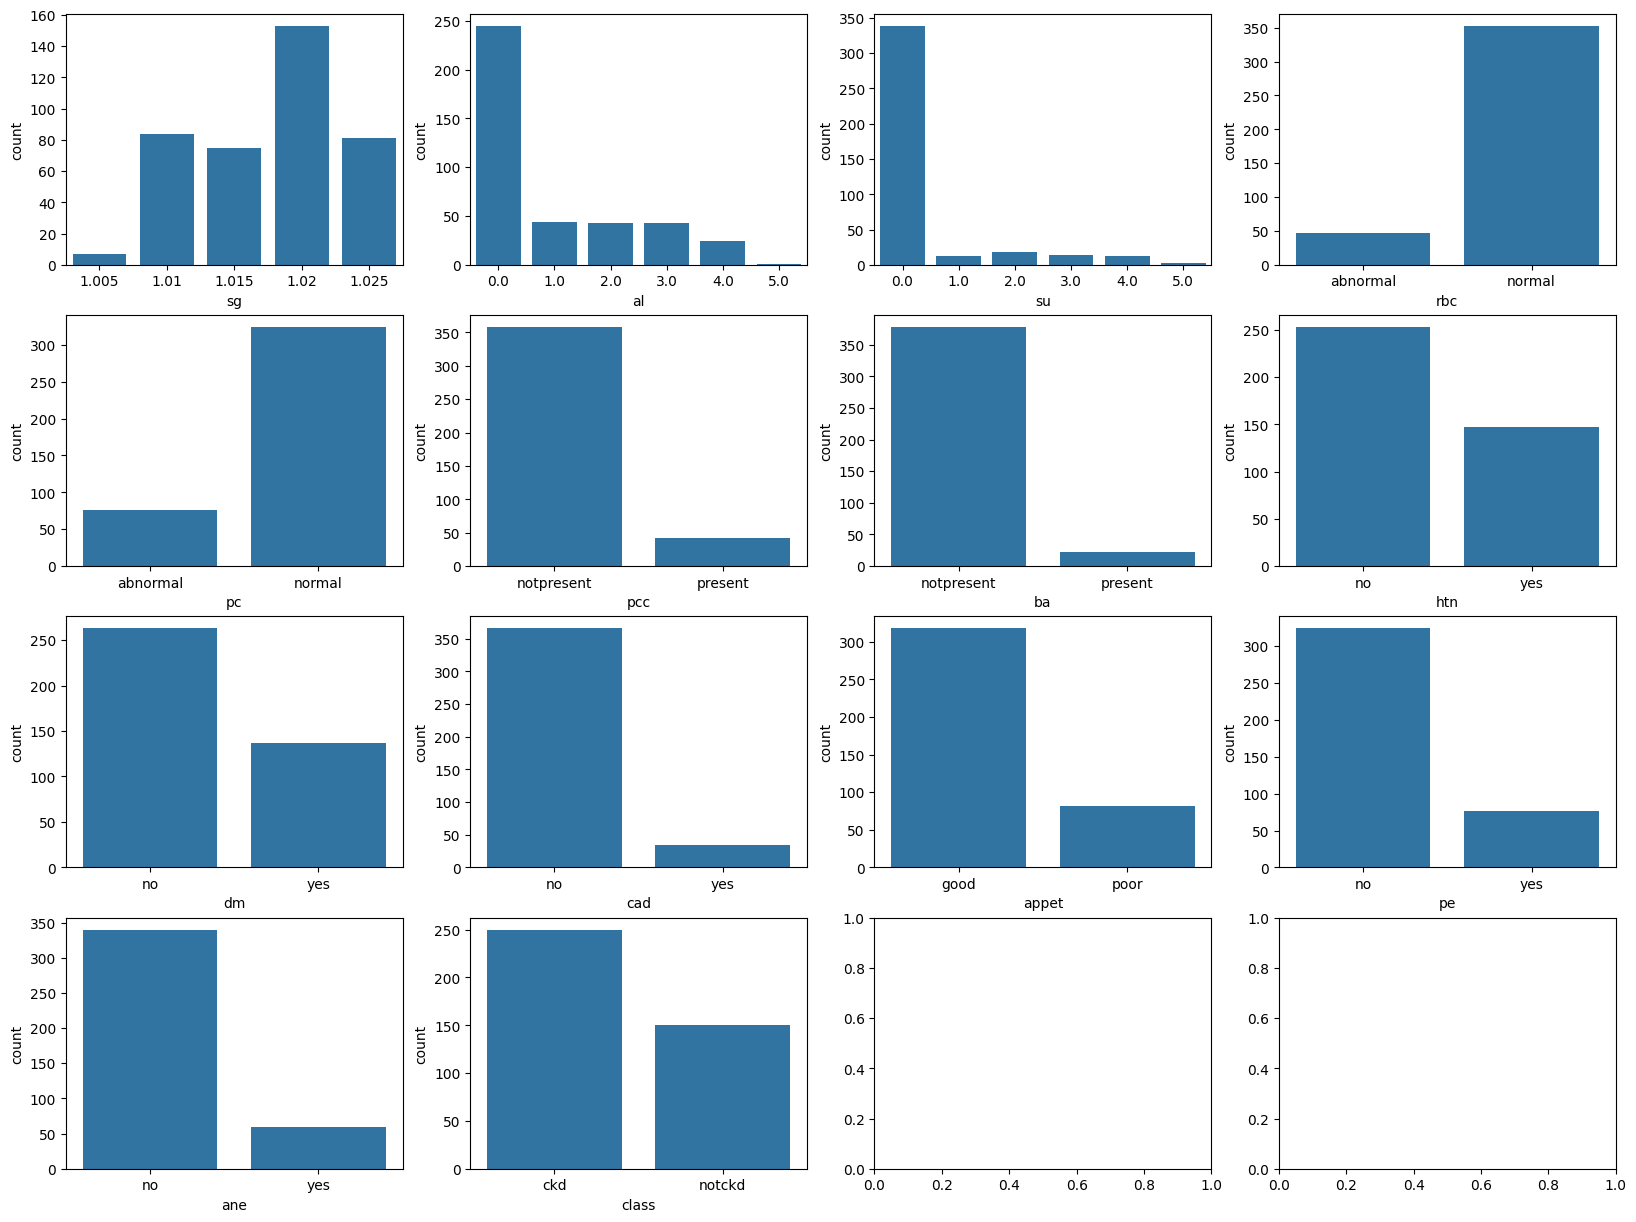

In [449]:
data2 = df.select_dtypes(include=['category'])
columns2 = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet','pe', 'ane', 'class']
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
for ax, col in zip(axs.flatten(), columns2):
    sns.countplot(data=data2, x=col, ax=ax)

(5)

There are many missing values and we fill them out with mean, median or mode.

In [303]:
na_num_col = df.select_dtypes(include=['float64']).columns
median_values = df[na_num_col].median()
df[na_num_col] = df[na_num_col].fillna(median_values)

In [304]:
mean_age = df['age'].mean()
df['age'] = df['age'].fillna(mean_age)
mean_rbcc = df['rbcc'].mean()
df['rbcc'] = df['rbcc'].fillna(mean_age)

In [305]:
na_cat_col = df.select_dtypes(include=['category']).columns
mode_values = df[na_cat_col].mode().iloc[0]
df[na_cat_col] = df[na_cat_col].fillna(mode_values)

In [306]:
df.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

(6)

Box plot is the method we used to identify the outliers for this data set.  The box plots use the values among each variable to construct the interquartile range and identify the values outside the interquartile range as outliers.  As we can see in these box plots, the result of identifying the outliers can be observed.  After that, we should decide how to manage those outliers.  Eventually, we are not going to remove any outliers.  That is because outliers can also prove critical features for observations and involve the ability to explain the variation of the dataset.  Moreover, in such studies related to medical data, we cannot remove outliers because natural variation can generate outliers in a statistical sense.  However, we make an additional adjustment to reduce the effect of outliers.  By achieving that, we scale the data so that outliers will produce less distance gap in the n-dimensional variable space.

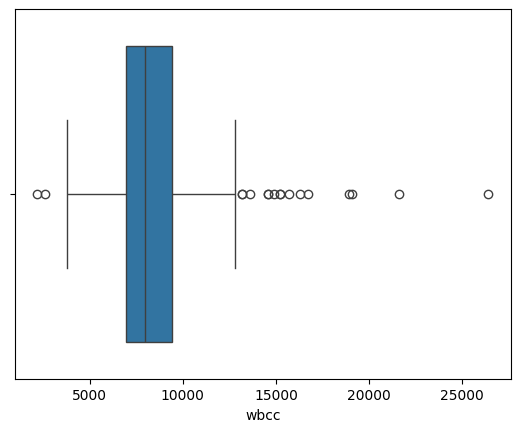

In [307]:
sns.boxplot(
    x = 'wbcc',
    data = df
)
plt.show()

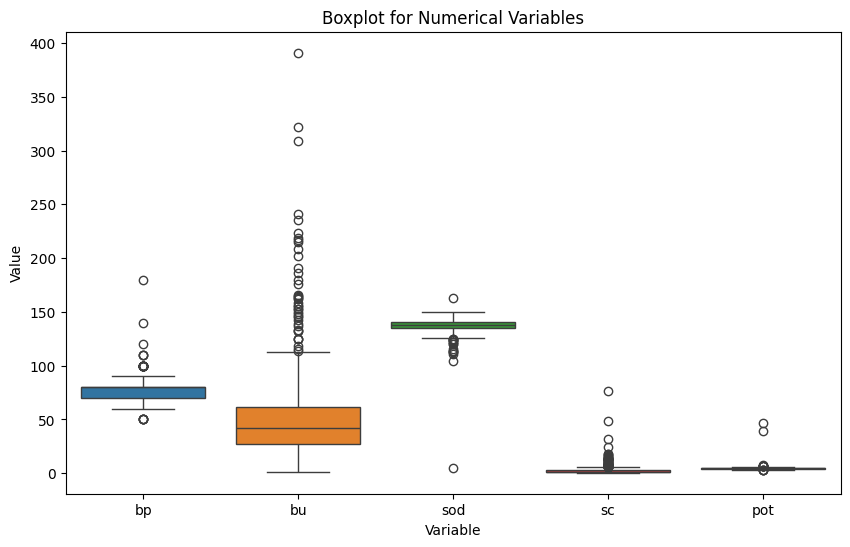

In [308]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['bp','bu','sod','sc','pot']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Boxplot for Numerical Variables')
plt.show()

(7)

In [309]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [312]:
float64_columns = df.select_dtypes(
    include=['float64']
    ).columns
float64_columns

Index(['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
       'rbcc'],
      dtype='object')

In [316]:
scaler = StandardScaler()
df[float64_columns] = scaler.fit_transform(
    df[float64_columns]
    )
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.210031,0.254214,1.020,1.0,0.0,normal,normal,notpresent,notpresent,-0.320122,...,0.603224,-0.197314,0.550044,yes,yes,no,good,no,no,ckd
1,-2.627234,-1.972476,1.020,4.0,0.0,normal,normal,notpresent,notpresent,-0.320122,...,-0.132789,-0.909782,0.074073,no,no,no,good,no,no,ckd
2,0.615355,0.254214,1.010,2.0,3.0,normal,normal,notpresent,notpresent,3.697618,...,-0.991470,-0.316059,0.074073,no,yes,no,poor,no,yes,ckd
3,-0.210031,-0.488016,1.005,4.0,0.0,normal,abnormal,present,notpresent,-0.373337,...,-0.868801,-0.632711,-0.996862,yes,no,no,poor,yes,yes,ckd
4,-0.033163,0.254214,1.010,2.0,0.0,normal,normal,notpresent,notpresent,-0.519679,...,-0.500795,-0.395222,-0.163913,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.202662,0.254214,1.020,0.0,0.0,normal,normal,notpresent,notpresent,-0.067350,...,0.971230,-0.632711,0.193066,no,no,no,good,no,no,notckd
396,-0.563768,-0.488016,1.025,0.0,0.0,normal,normal,notpresent,notpresent,-0.932096,...,1.829911,-0.197314,1.739973,no,no,no,good,no,no,notckd
397,-2.332453,0.254214,1.020,0.0,0.0,normal,normal,notpresent,notpresent,-0.599501,...,1.216567,-0.672293,0.788030,no,no,no,good,no,no,notckd
398,-2.037673,-1.230246,1.025,0.0,0.0,normal,normal,notpresent,notpresent,-0.413248,...,1.461905,-0.434803,1.382994,no,no,no,good,no,no,notckd


In [364]:
df_rep = df.copy()
for col in df.select_dtypes(include=['category']).columns:
    df_rep[col] = df_rep[col].cat.codes
df_rep

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.210031,0.254214,3,1,0,1,1,0,0,-0.320122,...,0.603224,-0.197314,0.550044,1,1,0,0,0,0,0
1,-2.627234,-1.972476,3,4,0,1,1,0,0,-0.320122,...,-0.132789,-0.909782,0.074073,0,0,0,0,0,0,0
2,0.615355,0.254214,1,2,3,1,1,0,0,3.697618,...,-0.991470,-0.316059,0.074073,0,1,0,1,0,1,0
3,-0.210031,-0.488016,0,4,0,1,0,1,0,-0.373337,...,-0.868801,-0.632711,-0.996862,1,0,0,1,1,1,0
4,-0.033163,0.254214,1,2,0,1,1,0,0,-0.519679,...,-0.500795,-0.395222,-0.163913,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.202662,0.254214,3,0,0,1,1,0,0,-0.067350,...,0.971230,-0.632711,0.193066,0,0,0,0,0,0,1
396,-0.563768,-0.488016,4,0,0,1,1,0,0,-0.932096,...,1.829911,-0.197314,1.739973,0,0,0,0,0,0,1
397,-2.332453,0.254214,3,0,0,1,1,0,0,-0.599501,...,1.216567,-0.672293,0.788030,0,0,0,0,0,0,1
398,-2.037673,-1.230246,4,0,0,1,1,0,0,-0.413248,...,1.461905,-0.434803,1.382994,0,0,0,0,0,0,1


In [372]:
df_rep_X = df_rep.drop(columns=['class'])
df_rep_y = df_rep[['class']].copy()

In [332]:
pca_X = PCA()

In [376]:
PC_col = [f'PC{i}' for i in range(1, 25)]
pca_loadings = pd.DataFrame(pca_X.fit(df_rep_X).components_.T, index=df_rep_X.columns, columns=PC_col)
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
age,0.137755,-0.081047,0.319693,-0.331325,-0.240790,-0.437035,-0.502340,0.441911,0.150573,0.065004,...,0.025838,0.069227,0.085547,-0.036529,-0.047009,0.023068,-0.037456,-0.006392,-0.008555,-0.006121
bp,0.150942,-0.004417,0.199548,-0.191393,-0.390976,0.525339,0.467933,0.468305,0.125809,0.033213,...,0.006632,-0.007161,0.011049,-0.008161,-0.022279,-0.045568,-0.033616,0.011417,0.020556,-0.010310
sg,-0.309953,0.195329,0.196904,0.038578,-0.020946,-0.080523,0.094306,0.248677,-0.829944,0.186428,...,0.004620,0.024854,-0.015389,-0.047993,0.022994,0.003431,-0.032893,-0.030568,0.008199,0.015124
al,0.403817,-0.256445,-0.399620,0.401645,0.283857,0.062485,-0.119490,0.516631,-0.138680,0.073914,...,0.080228,-0.132915,0.125039,0.019523,0.032291,-0.009117,-0.042510,0.011791,-0.001056,-0.053145
su,0.189053,-0.459589,0.435488,0.061780,0.176821,0.066800,0.148744,-0.152592,-0.061126,-0.088059,...,0.004773,0.076226,0.040757,0.030644,-0.014478,0.035312,0.044068,-0.061756,0.002465,-0.004320
rbc,-0.049782,0.006345,0.040993,-0.025402,-0.023283,-0.053990,0.014981,-0.051384,0.007886,0.063071,...,0.092943,-0.111087,0.155818,0.565289,0.088528,-0.569457,-0.387180,-0.135218,-0.276795,-0.192007
pc,-0.094244,0.027623,0.051017,-0.073008,-0.007740,-0.018708,0.024465,-0.056832,0.020685,-0.004704,...,0.171498,-0.471906,0.597162,-0.046125,0.056035,-0.107151,0.060179,0.179013,0.391909,0.366590
pcc,0.052401,-0.036490,-0.042185,0.005780,0.017172,-0.016018,-0.028331,0.037163,-0.001421,0.001184,...,-0.035785,0.253078,-0.366665,0.293769,0.325894,-0.172740,-0.148751,0.043931,0.643464,0.306151
ba,0.029172,-0.017540,-0.033106,0.019288,0.010651,0.008956,0.001576,0.041842,0.004464,-0.012127,...,0.002215,0.108523,-0.072628,-0.054802,0.102347,-0.133031,0.021245,0.090923,-0.553179,0.791666
bgr,0.200640,-0.413593,0.343218,-0.111657,0.184861,0.110655,-0.076574,-0.221916,-0.257044,-0.023383,...,-0.022334,0.001787,0.068390,-0.021178,-0.081467,-0.067497,-0.016291,0.008032,0.011787,0.027082


In [377]:
pc_scores = pd.DataFrame(pca_X.fit_transform(df_rep_X), columns=PC_col, index=df_rep_X.index)
pc_scores.var()

PC1     5.316296
PC2     1.802314
PC3     1.390526
PC4     1.164807
PC5     1.080798
PC6     0.927405
PC7     0.824419
PC8     0.757543
PC9     0.672903
PC10    0.455250
PC11    0.385333
PC12    0.337465
PC13    0.243379
PC14    0.182063
PC15    0.151388
PC16    0.136227
PC17    0.102358
PC18    0.097570
PC19    0.088753
PC20    0.078065
PC21    0.071985
PC22    0.054322
PC23    0.041604
PC24    0.038728
dtype: float64

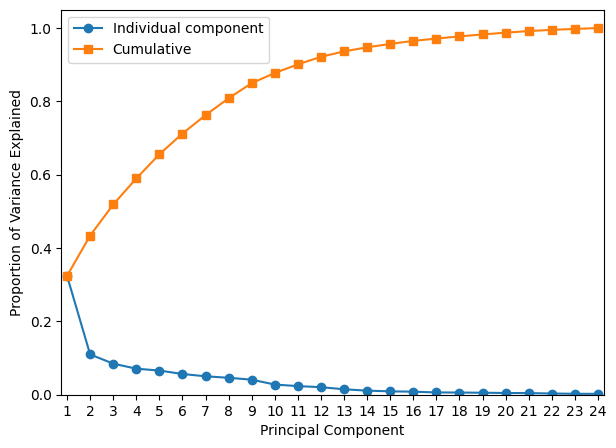

In [378]:
plt.figure(figsize=(7,5))

plt.plot(range(1, 25), pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(range(1, 25), np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75, 24.25)
plt.ylim(0, 1.05)
plt.xticks(range(1, 25))
plt.legend(loc=2)
plt.show();

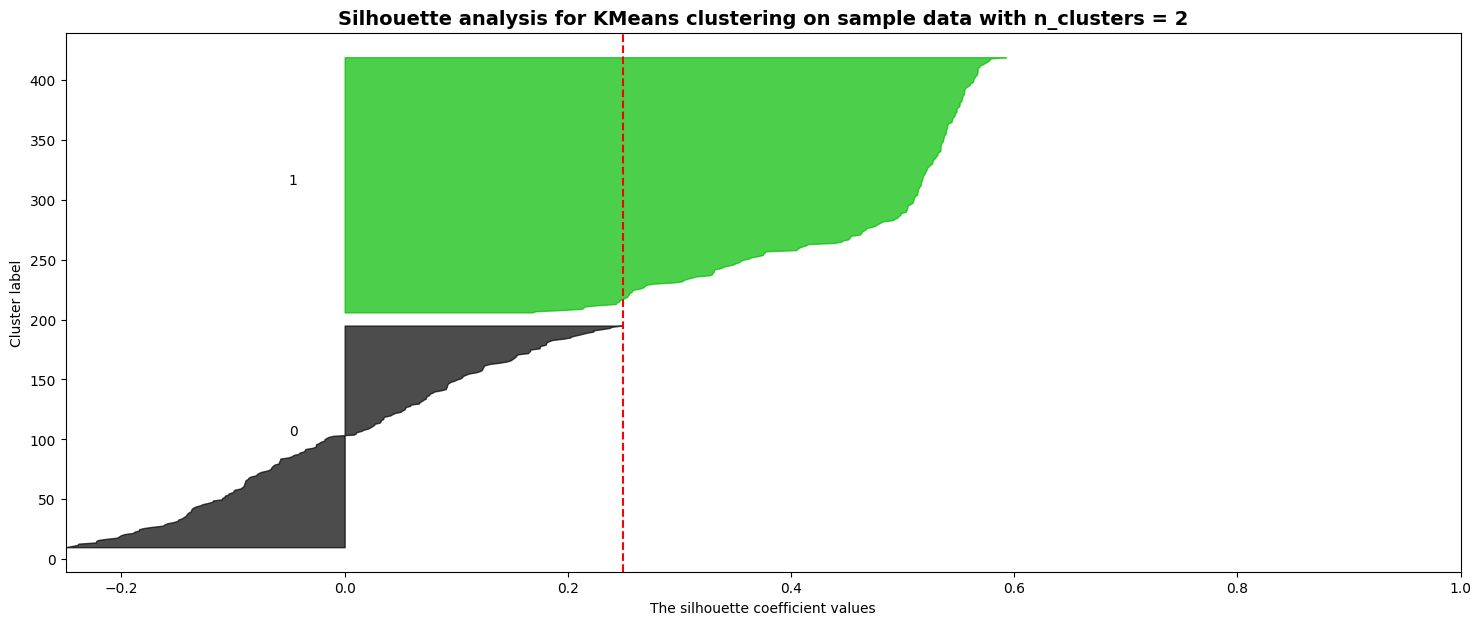

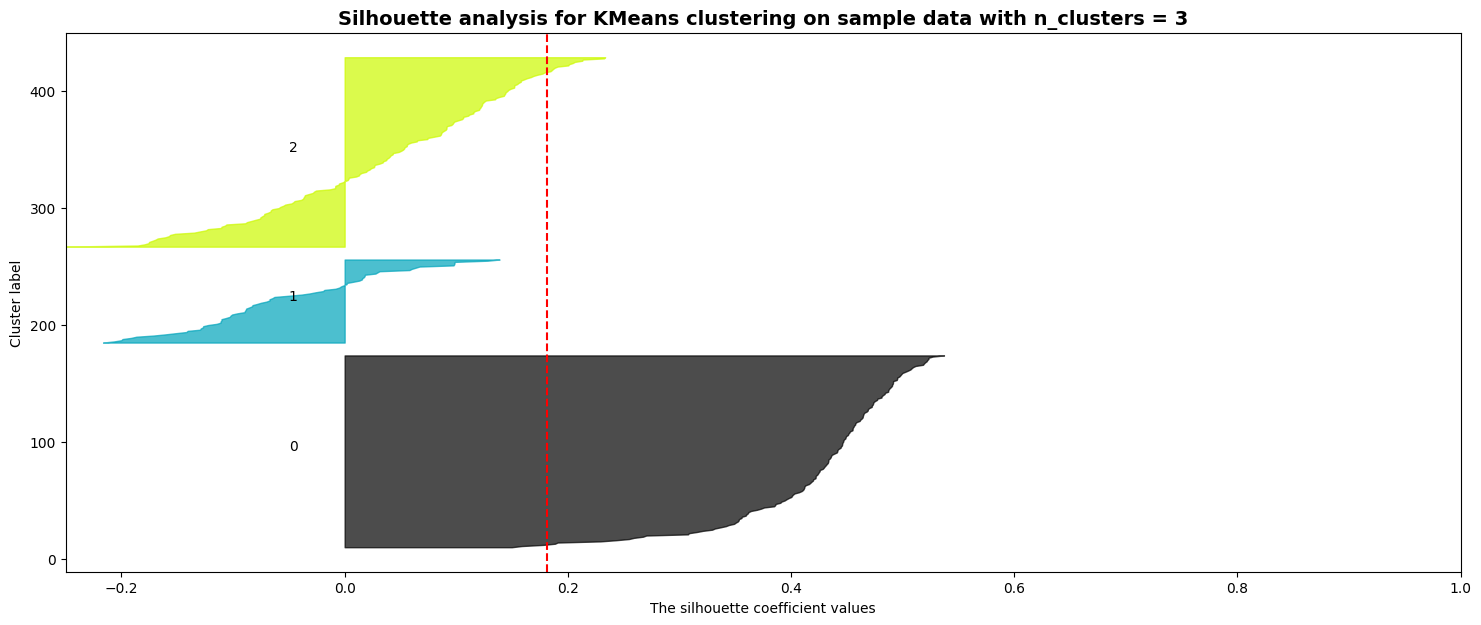

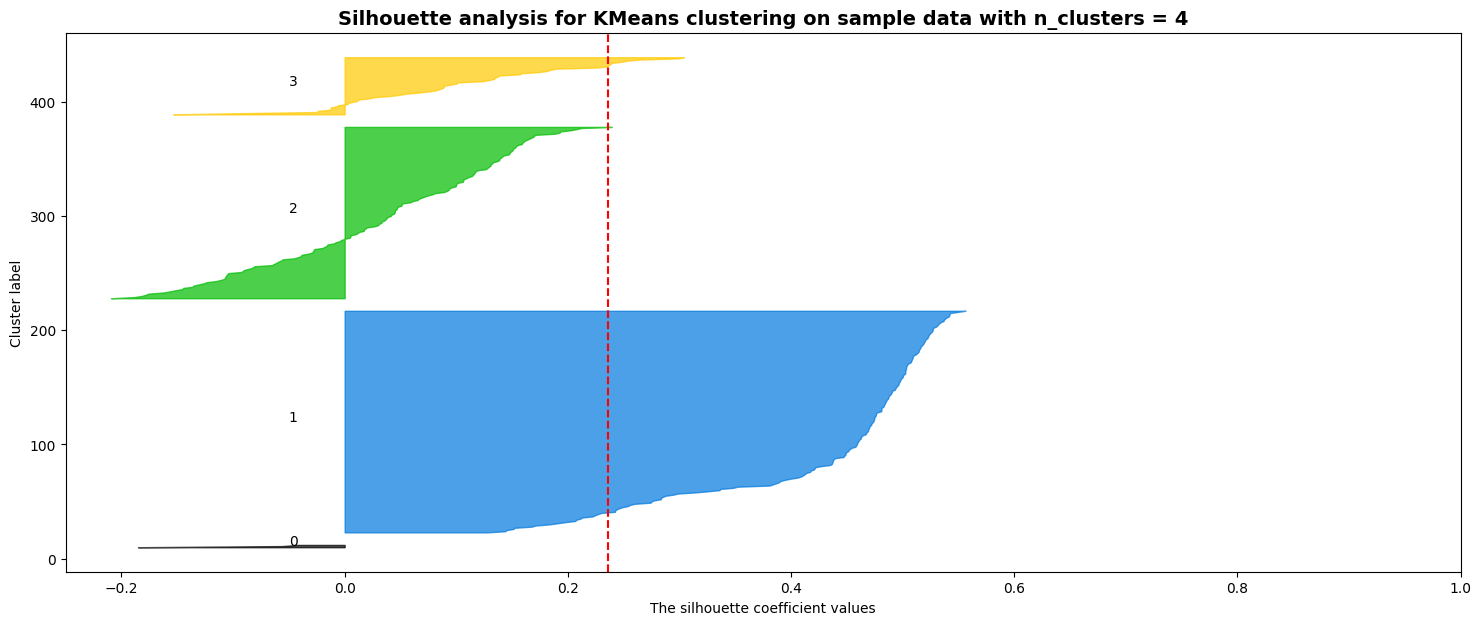

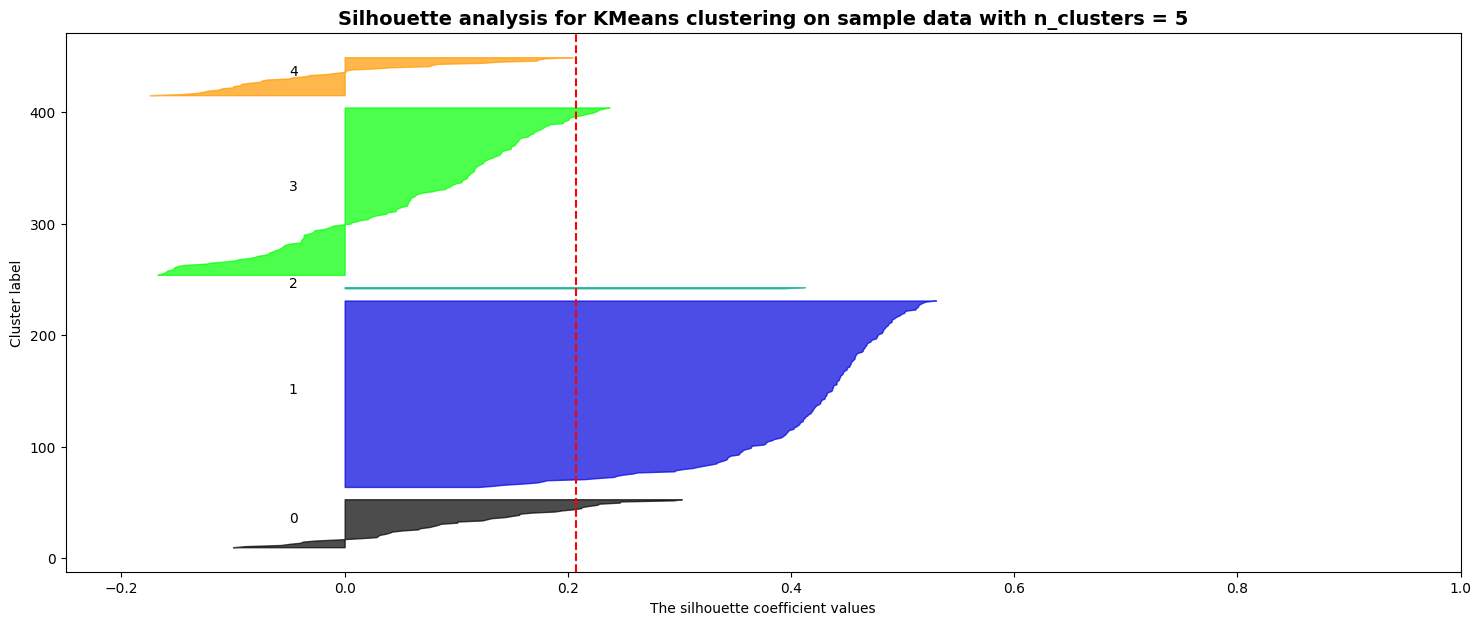

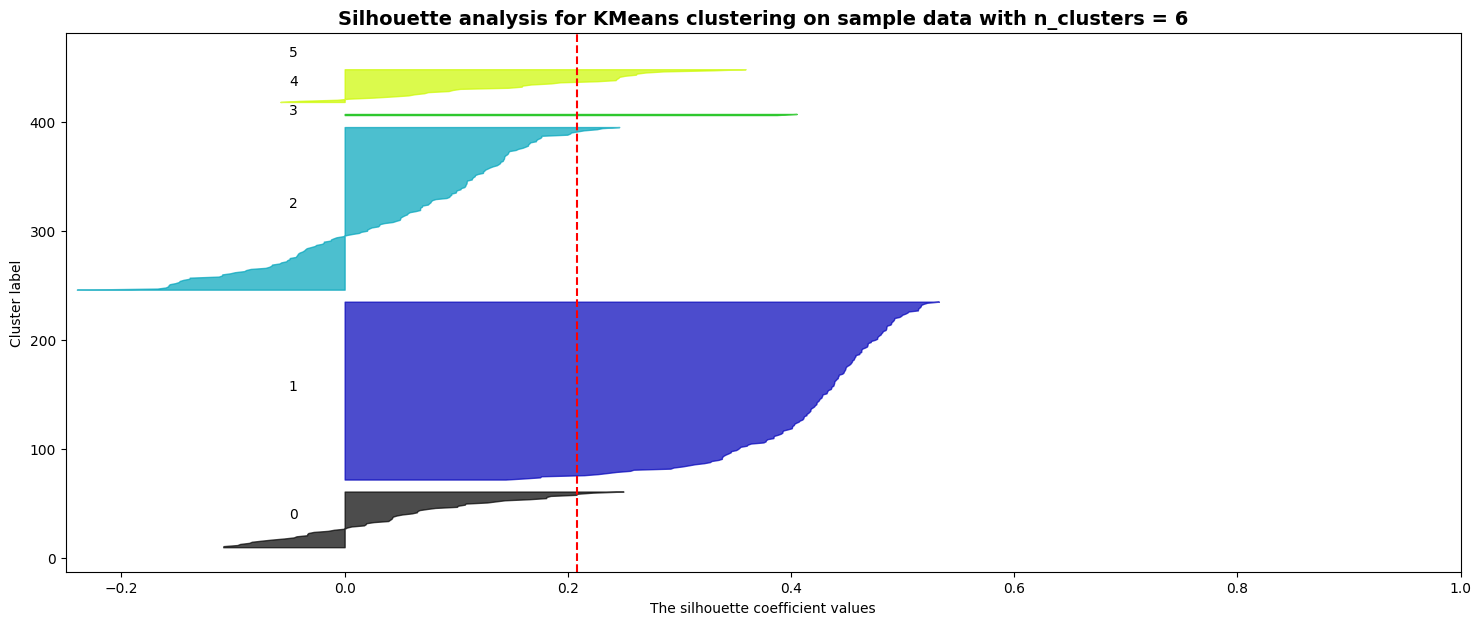

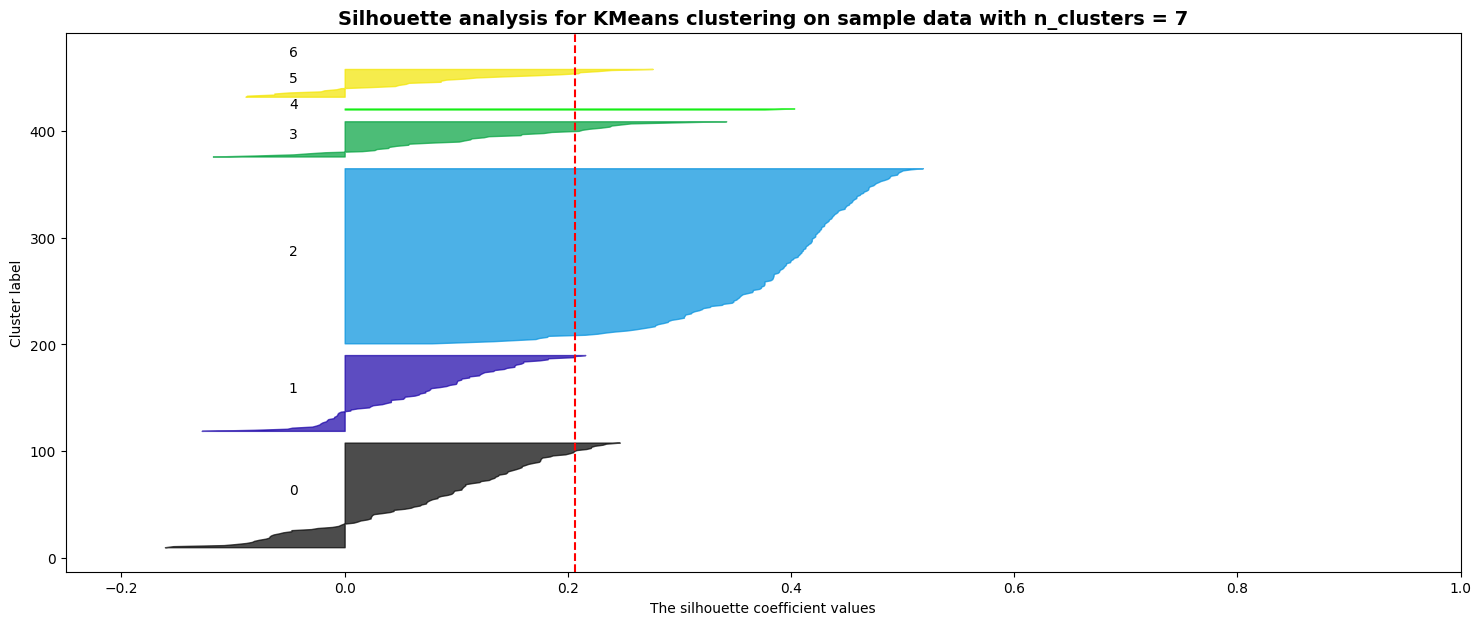

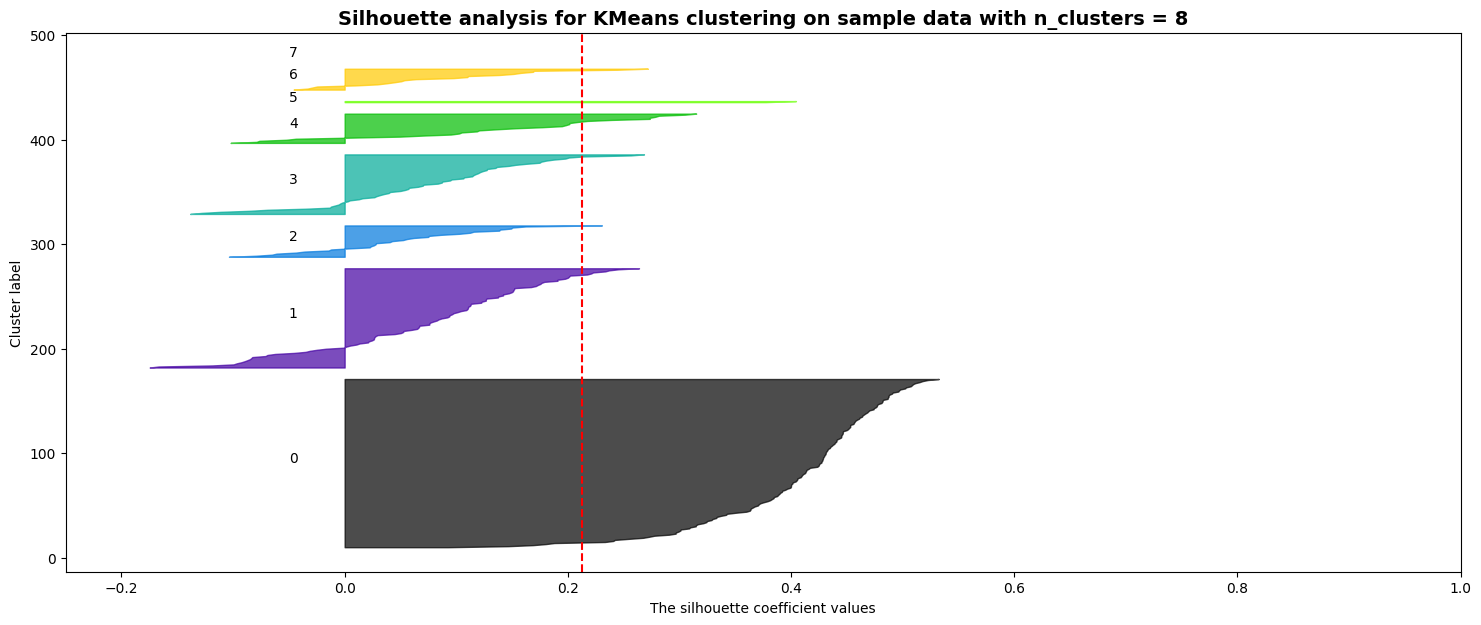

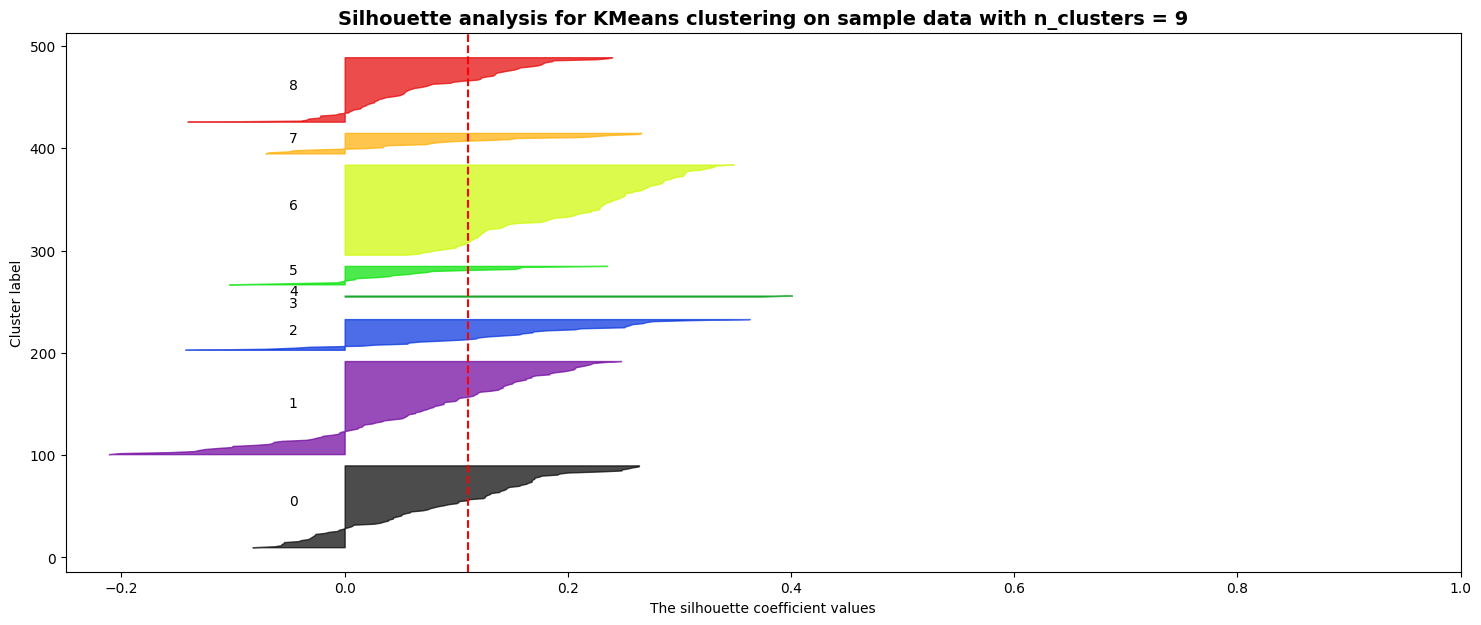

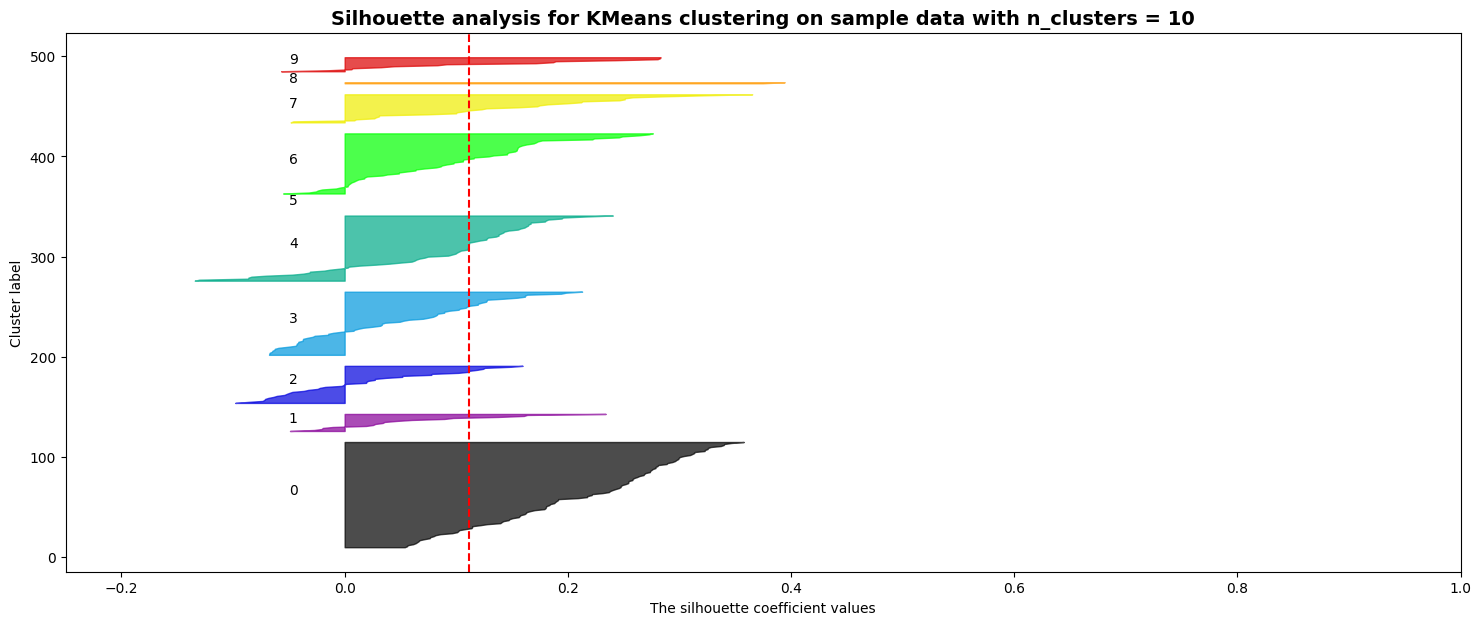

In [472]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(df_rep_X)
    silhouette_avg_km = silhouette_score(df_rep_X, cluster_labels_km)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_rep_X, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.25, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

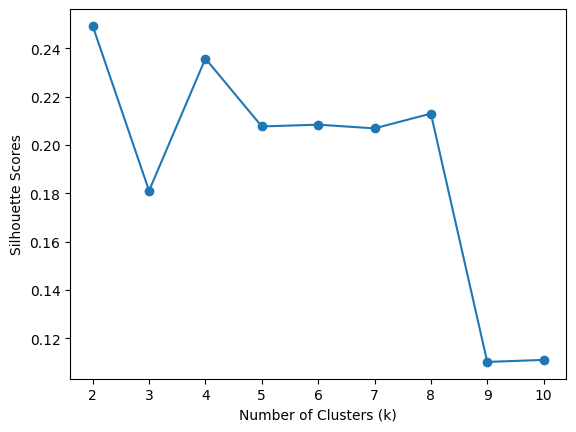

In [473]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]
silhouette_vlu = []
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(df_rep_X)
    silhouette_avg_km = silhouette_score(df_rep_X, cluster_labels_km)
    silhouette_vlu.append(silhouette_avg_km)
plt.plot(range_n_clusters,silhouette_vlu, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores');

In [478]:
km2 = KMeans(n_clusters=2, n_init=20, random_state=0)
km2.fit(df_rep_X)

KMeans(n_clusters=2, n_init=20, random_state=0)

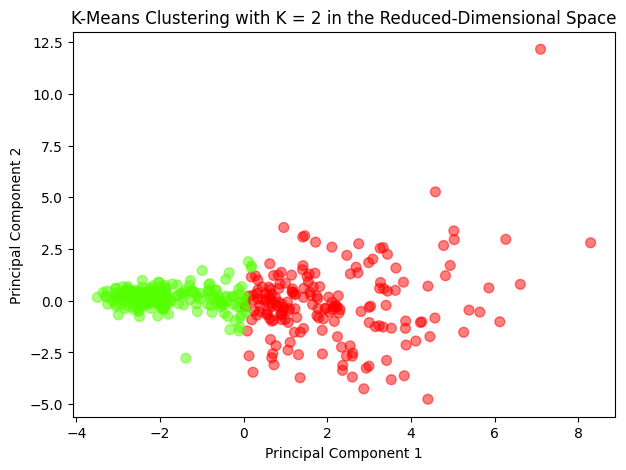

In [479]:
plt.figure(figsize=(7, 5))
cmap = plt.cm.prism
plt.scatter(pc_scores.iloc[:,0], pc_scores.iloc[:,1], c=km2.labels_, cmap=cmap, alpha=0.5, s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with K = 2 in the Reduced-Dimensional Space');